# Once-through model run variable analysis

Run the models once-through, multiple times using the same optimisation parameter vector. Look at how the response variables change with successive runs for the same parameters.

In [2]:
%load_ext autoreload
%autoreload 2

import process
from process.main import SingleRun
from pathlib import Path
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [3]:
input_file = "large_tokamak_once_IN.DAT"

# Run process on an input file in a temporary directory
single_run = SingleRun(str(input_file))
single_run.run()

The IN.DAT file does not contain any obsolete variables.
 tmargmin_cs and tmargmin should not both be specified in IN.DAT.
 tmargmin_cs has been ignored.
 
 **************************************************************************************************************
 ************************************************** PROCESS ***************************************************
 ************************************** Power Reactor Optimisation Code ***************************************
 **************************************************************************************************************
 
   Program :
   Version : 3.1.0   Release Date :: 2024-03-21
   Tag No. :
    Branch : once-through-model-study
   Git log : Merge branch |ukaea:main| into once-through-model-study
 Date/time : 16 May 2024 10:13:31 +01:00(hh:mm) UTC
      User : jon
  Computer : jon-Precision-3560
 Directory : /home/jon/code/notebooks/process-once-through-model-study
     Input : /home/jon/code/notebooks/pro

process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.
process.power - WARNING - WARNING: Power balance across separatrix is in error by more than 5 MW.


 
 ******************************************** Errors and Warnings *********************************************
 
 PROCESS status flag:   Warning messages                                  
 
 ID  LEVEL  MESSAGE
 93     2   BURN: Negative burn time available; reduce t_fusion_ramp or raise PF coil V-s ca
 Floating point diagnostic values for this error:
   1)   -1.00000E+01
   2)   -1.77636E-15
   3)    4.16923E-02
   4)    1.00000E+01
  
135     1   OUTPF: CS not using max current density: further optimisation may be possible   
  
 
 ******************************************* End of PROCESS Output ********************************************
 


In [4]:
# Extract mfile data
# Remove last mfile: only want model call numbered ones
Path("large_tokamak_once_MFILE.DAT").unlink(missing_ok=True)

mfile_paths = Path.cwd().glob("*MFILE.DAT")
mfile_runs = []

for mfile_path in mfile_paths:
    mfile = process.io.mfile.MFile(str(mfile_path))
    call_num = int(mfile_path.name.split(sep="_")[1])
    mfile_data = {"run": call_num}

    for var in mfile.data.keys():
        # Extract value
        mfile_data[var] = mfile.data[var].get_scan(-1)

    mfile_runs.append(mfile_data)

df = pd.DataFrame(mfile_runs)
df = df.set_index("run")
df = df.sort_index()
df

,norm_objf,eq_con001,eq_con002,eq_con011,eq_con005,eq_con008,eq_con009,eq_con013,eq_con015,eq_con030,...,username,runtitle,tagno,branch_name,commsg,fileprefix,ioptimz,minmax,error_status,error_id
run,,,,,,,,,,,,,,,,,,,,,
1,1.6,-0.19528,-0.080119,0.017262,0.256852,2.035115,1.852643,-1.000000,0.445221,0.659806,...,jon,"""Generic large tokamak",,once-through-model-study,Merge branch |ukaea:main| into once-through-mo...,/home/jon/code/notebooks/process-once-through-...,-2.0,1.0,NaN,NaN
2,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771752,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.6,-0.19532,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Check for variation
df.describe()

,norm_objf,eq_con001,eq_con002,eq_con011,eq_con005,eq_con008,eq_con009,eq_con013,eq_con015,eq_con030,...,pnetelmw/(powfmw+emultmw,pnetelmw/powfmw,cirpowfr,waterusetower,wateruserecirc,wateruseonethru,ioptimz,minmax,error_status,error_id
count,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000e+01,1.0,1.0,1.0,1.0
mean,1.6,-0.195316,-0.080045,0.019287,0.256852,2.036329,1.853784,-0.794280,0.444906,0.659806,...,8.321037,9.904748,0.824226,37776.264517,12674.745875,1.242125e+06,-2.0,1.0,2.0,135.0
std,0.0,0.000012,0.000026,0.000712,0.000000,0.000427,0.000401,0.072283,0.000111,0.000000,...,0.635751,0.756751,0.013429,4.851744,1.627864,1.595307e+02,NaN,NaN,NaN,NaN
min,1.6,-0.195320,-0.080119,0.017262,0.256852,2.035115,1.852643,-1.000000,0.444870,0.659806,...,6.539740,7.784424,0.819210,37774.730261,12674.231099,1.242075e+06,-2.0,1.0,2.0,135.0
25%,1.6,-0.195320,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,8.557789,10.186561,0.819210,37774.730261,12674.231099,1.242075e+06,-2.0,1.0,2.0,135.0
50%,1.6,-0.195320,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,8.558529,10.187442,0.819210,37774.730261,12674.231099,1.242075e+06,-2.0,1.0,2.0,135.0
75%,1.6,-0.195320,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.444870,0.659806,...,8.558529,10.187442,0.819225,37774.730261,12674.231099,1.242075e+06,-2.0,1.0,2.0,135.0
max,1.6,-0.195280,-0.080036,0.019512,0.256852,2.036464,1.853911,-0.771381,0.445221,0.659806,...,8.558529,10.187442,0.861855,37790.072822,12679.378857,1.242579e+06,-2.0,1.0,2.0,135.0


Some vars have some variation (i.e. a standard deviation). Order by std:

In [6]:
# Filter for non-floats (e.g. strings) and NaNs
df_nums = df.select_dtypes(include=np.number)
# Drop columns with nans
df_nums = df_nums.dropna(axis=1)
stds = df_nums.std()
# Returns sorted copy only
stds.sort_values(ascending=False)

coe            3.368423e+21
qfuel          3.612606e+17
dlimit(4)      2.562264e+17
dntau*te       2.258169e+17
rndfuel        5.267520e+16
                   ...     
tftsgap        0.000000e+00
thshield_ib    0.000000e+00
blnkith        0.000000e+00
scrapli        0.000000e+00
norm_objf      0.000000e+00
Length: 938, dtype: float64

Text(0.5, 0.98, 'Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables')

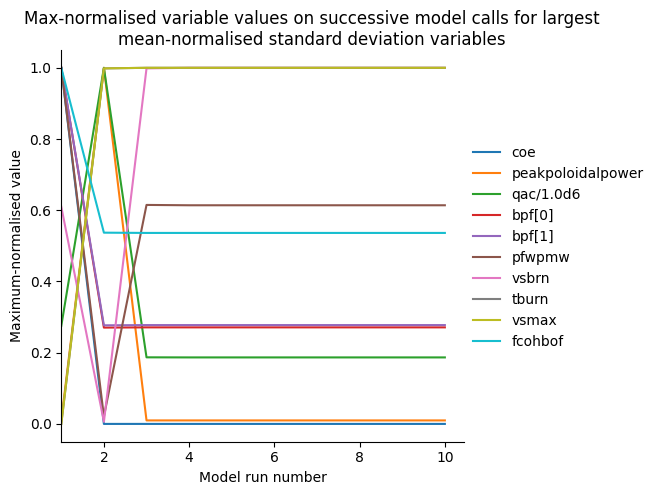

In [13]:
# Need to normalise stds first (std / mean)
# Std as fraction of mean
norm_stds = stds / df_nums.mean()
sorted_norm_stds = norm_stds.sort_values(ascending=False)
sorted_norm_stds

# Get top 10 largest normalised stds by var name
largest_norm_stds_indexes = sorted_norm_stds[0:10].index
# Normalise to maximum values
norm_run_values_with_largest_rel_stds = (
    df_nums[largest_norm_stds_indexes] / df_nums[largest_norm_stds_indexes].max()
)
norm_run_values_with_largest_rel_stds

# Plot
ax = sns.relplot(data=norm_run_values_with_largest_rel_stds, kind="line", dashes=False)
ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1, None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(
    "Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables"
)

## Actual data for a large-fluctuating variable

Text(0.5, 0.98, 'Absolute value of pfwpmw over multiple model runs')

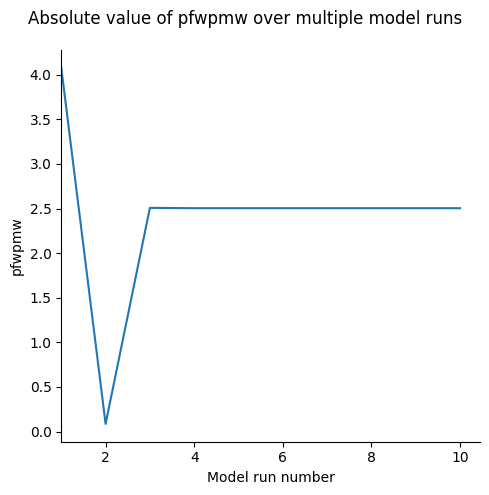

In [8]:
# Plot
ax = sns.relplot(data=df_nums["pfwpmw"], kind="line", dashes=False)
# ax = sns.lineplot(data=df_nums["pfwpmw"], dashes=False, marker="o")
# ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1, None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Absolute value of pfwpmw over multiple model runs")

## Any variations after 3 model evaluations?

In [9]:
df_nums_after_run_3 = df_nums.loc[3:, :]
df_nums_after_3_stds = df_nums_after_run_3.std()
df_nums_after_3_stds.sort_values(ascending=False)

bktcycles          12.118344
tcycle              0.945233
coe                 0.660921
volnucb             0.593755
cryv                0.593755
                     ...    
diaipf.             0.000000
psipf.              0.000000
vburn               0.000000
rplas               0.000000
wateruseonethru     0.000000
Length: 938, dtype: float64

Some still varying after 3 model runs. Check.

Text(0.5, 0.98, 'Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables still varying after 3 runs')

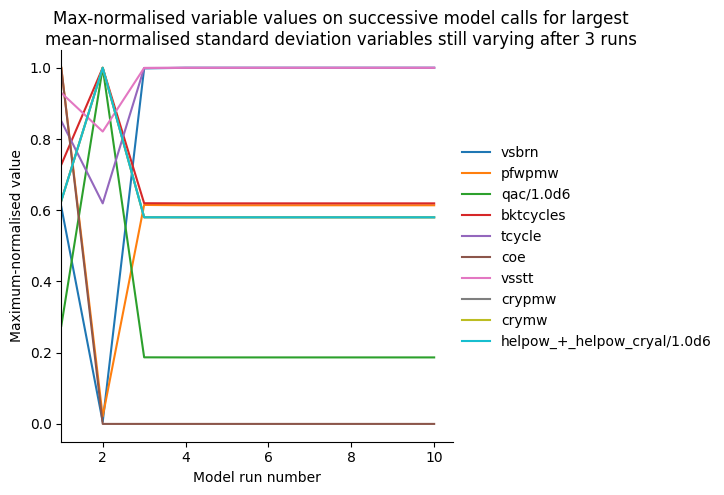

In [10]:
# Need to normalise stds first (std / mean)
# Std as fraction of mean
norm_stds_after_3 = df_nums_after_3_stds / df_nums_after_run_3.mean()
sorted_norm_stds_after_3 = norm_stds_after_3.sort_values(ascending=False)
sorted_norm_stds_after_3

# Get top 10 largest normalised stds by var name
largest_norm_stds_after_3_indexes = sorted_norm_stds_after_3[0:10].index
# Normalise to maximum values
norm_run_values_with_largest_rel_stds_after_3 = (
    df_nums[largest_norm_stds_after_3_indexes]
    / df_nums[largest_norm_stds_after_3_indexes].max()
)
norm_run_values_with_largest_rel_stds_after_3

# Plot
ax = sns.relplot(
    data=norm_run_values_with_largest_rel_stds_after_3, kind="line", dashes=False
)
ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1, None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle(
    "Max-normalised variable values on successive model calls for largest\nmean-normalised standard deviation variables still varying after 3 runs"
)

Text(0.5, 0.98, 'Absolute value of vsbrn from model run 3 onwards')

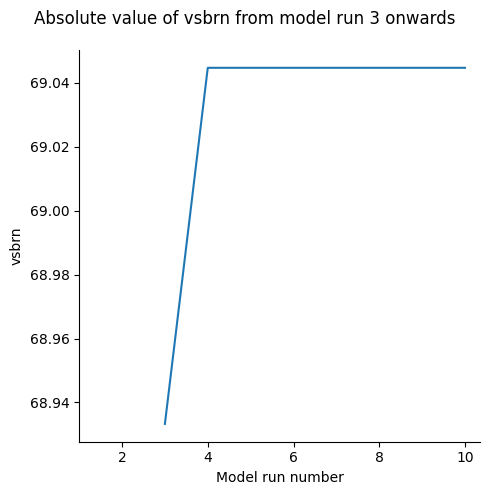

In [11]:
# Plot
ax = sns.relplot(data=df_nums.loc[3:, "vsbrn"], kind="line", dashes=False)
# ax = sns.lineplot(data=df_nums["pfwpmw"], dashes=False, marker="o")
# ax.set_ylabels("Maximum-normalised value")
ax.set_xlabels("Model run number")
ax.set(xlim=(1, None))
ax.fig.subplots_adjust(top=0.9)
ax.fig.suptitle("Absolute value of vsbrn from model run 3 onwards")

## Proportion that varies

[0.3049040511727079,
 0.08848614072494669,
 0.03837953091684435,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

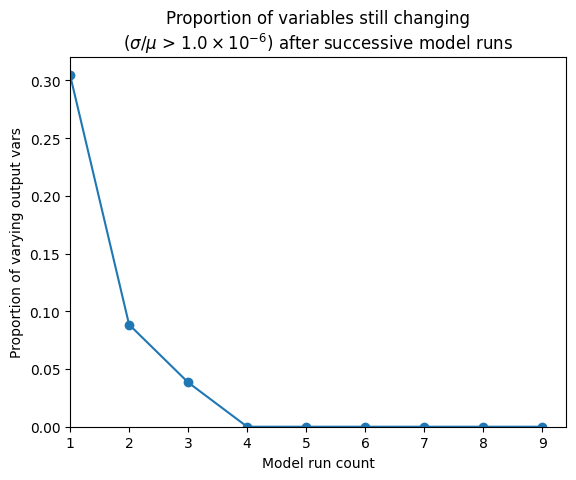

In [12]:
# Proportion of variables that are still varying after certain number of calls
proportion_varying = []
# Find std for 10 latest rows, then 9, then 8, ... to last 2 rows
for i in range(1, df_nums.shape[0]):
    df_after_run_i = df_nums.loc[i:]
    stds_after_run_i = df_after_run_i.std()
    means_after_run_i = df_after_run_i.mean()
    # Get fraction of vars that have a mean-normalised std > 1.0e-6
    still_varying_frac = (
        stds_after_run_i[stds_after_run_i / means_after_run_i > 1.0e-6].count()
        / stds_after_run_i.count()
    )
    proportion_varying.append(still_varying_frac)

fig, ax = plt.subplots()
ax.plot(range(1, 10), proportion_varying, "-o")
ax.set_ylabel("Proportion of varying output vars")
ax.set_xlabel("Model run count")
ax.set_title(
    "Proportion of variables still changing\n"
    + r"($\sigma/\mu$ > $1.0\times10^{-6}$) after successive model runs"
)
ax.set_ylim(0, None)
ax.set_xlim(1, None)

proportion_varying